## Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
## Salary_hike -> Build a prediction model for Salary_hike
### (Use Dataset 'Salary_Data')

### Importing Libraries & Dataset

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
import statsmodels.api
from statsmodels.graphics.regressionplots import influence_plot

In [29]:
salary_data=pd.read_csv("C:\Vishal\ExcelR\Data Science\Assignments\Salary_Data.csv")
salary_data.head() 

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Performing Exploratory Data Analysis

In [30]:
#Checking for Null Values
salary_data.info()
#No Null values detected & correct data types present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


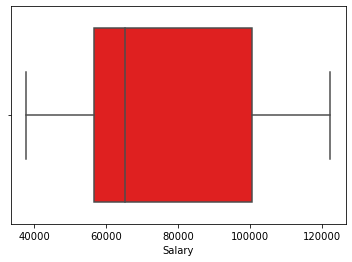

In [31]:
#Checking for outliers
sns.boxplot(x=salary_data.Salary, color='red');

<AxesSubplot:xlabel='YearsExperience'>

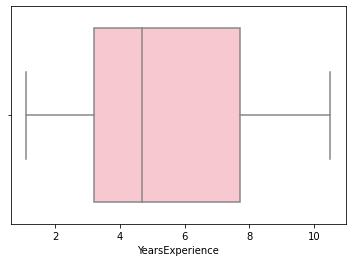

In [32]:
sns.boxplot(x=salary_data.YearsExperience,color='pink')
#No outliers detected

### Correlation Analysis

<AxesSubplot:>

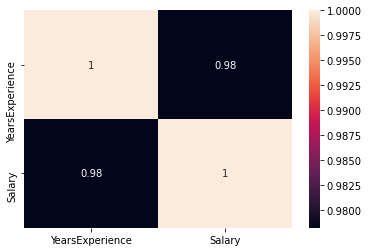

In [33]:
#Finding correlation using Heatmap
sns.heatmap(salary_data[['YearsExperience','Salary']].corr(),annot=True)
#We're having a good positive correlation of 0.98 between the variables

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

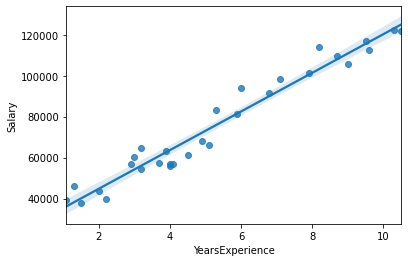

In [34]:
sns.regplot(x=salary_data['YearsExperience'],y=salary_data['Salary'])

### Building the model

In [35]:
#Identifying Feature x and Target y and Initializing the Model
Regression_Model=sm.ols('Salary~YearsExperience',data=salary_data).fit()

### Model Testing

In [36]:
#Calculating coefficient parameters
print(Regression_Model.params)

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64


In [37]:
#Calculating t-values & p-values
print(Regression_Model.tvalues,'\n',Regression_Model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [38]:
print('r-squared value: ',Regression_Model.rsquared,'r-squared adjusted value: ',Regression_Model.rsquared_adj)

r-squared value:  0.9569566641435086 r-squared adjusted value:  0.9554194021486339


### Model Tranformation - Rebuilding to improve accuracy

Transforming variables for accuracy

In [45]:
Regression_Model_1=sm.ols('Salary~np.log(YearsExperience)',data=salary_data).fit()

In [46]:
#Calculating coefficient parameters
print(Regression_Model_1.params)

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64


In [47]:
#Calculating t-values & p-values
print(Regression_Model_1.tvalues,'\n',Regression_Model_1.pvalues)

Intercept                   2.895135
np.log(YearsExperience)    12.791989
dtype: float64 
 Intercept                  7.268813e-03
np.log(YearsExperience)    3.250155e-13
dtype: float64


In [48]:
print('r-squared value: ',Regression_Model_1.rsquared,'r-squared adjusted value: ',Regression_Model_1.rsquared_adj)

r-squared value:  0.8538888828756969 r-squared adjusted value:  0.8486706286926861


Exponential transformation

In [49]:
Regression_Model_2=sm.ols('np.log(Salary)~YearsExperience',data=salary_data).fit()

In [50]:
#Calculating coefficient parameters
print(Regression_Model_2.params)

Intercept          10.507402
YearsExperience     0.125453
dtype: float64


In [51]:
#Calculating t-values & p-values
print(Regression_Model_2.tvalues,'\n',Regression_Model_2.pvalues)

Intercept          273.327166
YearsExperience     19.584833
dtype: float64 
 Intercept          1.604634e-49
YearsExperience    7.027439e-18
dtype: float64


In [52]:
print('r-squared value: ',Regression_Model_2.rsquared,'r-squared adjusted value: ',Regression_Model_2.rsquared_adj)

r-squared value:  0.9319671194084195 r-squared adjusted value:  0.9295373736730059


Quadratic Transformation

In [53]:
Regression_Model_3=sm.ols('np.sqrt(Salary)~YearsExperience',data=salary_data).fit()

In [54]:
#Calculating coefficient parameters
print(Regression_Model_3.params)

Intercept          180.700221
YearsExperience     17.056532
dtype: float64


In [55]:
#Calculating t-values & p-values
print(Regression_Model_3.tvalues,'\n',Regression_Model_2.pvalues)

Intercept          40.646251
YearsExperience    23.025247
dtype: float64 
 Intercept          1.604634e-49
YearsExperience    7.027439e-18
dtype: float64


In [56]:
print('r-squared value: ',Regression_Model_3.rsquared,'r-squared adjusted value: ',Regression_Model_3.rsquared_adj)

r-squared value:  0.9498353533865289 r-squared adjusted value:  0.9480437588646192


Reciprocal Transformations

In [71]:
Regression_Model_4=sm.ols('np.reciprocal(Salary)~YearsExperience',data=salary_data).fit()

In [72]:
#Calculating coefficient parameters
print(Regression_Model_4.params)

Intercept          0.000025
YearsExperience   -0.000002
dtype: float64


In [73]:
#Calculating t-values & p-values
print(Regression_Model_4.tvalues,'\n',Regression_Model_4.pvalues)

Intercept          29.913113
YearsExperience   -13.162319
dtype: float64 
 Intercept          8.500940e-23
YearsExperience    1.631985e-13
dtype: float64


In [74]:
print('r-squared value: ',Regression_Model_4.rsquared,'r-squared adjusted value: ',Regression_Model_4.rsquared_adj)

r-squared value:  0.8608672473082564 r-squared adjusted value:  0.8558982204264084


In [75]:
# Comparing Model Accuracy
d = {'Models': ['Regression_Model', 'Regression_Model_1', 'Regression_Model_2', 'Regression_Model_3', 'Regression_Model_4'], 'Adjusted rsquare': [Regression_Model.rsquared_adj, Regression_Model_1.rsquared_adj, Regression_Model_2.rsquared_adj, Regression_Model_3.rsquared_adj,Regression_Model_4.rsquared_adj]}
df = pd.DataFrame(d)
df

,Models,Adjusted rsquare
0,Regression_Model,0.955419
1,Regression_Model_1,0.848671
2,Regression_Model_2,0.929537
3,Regression_Model_3,0.948044
4,Regression_Model_4,0.855898


As the Regression_Model	is having highest accuracy of 95.41% we'll use that model for prediction

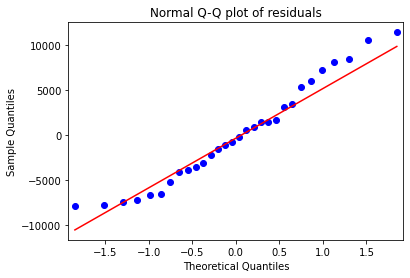

In [76]:
statsmodels.api.qqplot(Regression_Model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

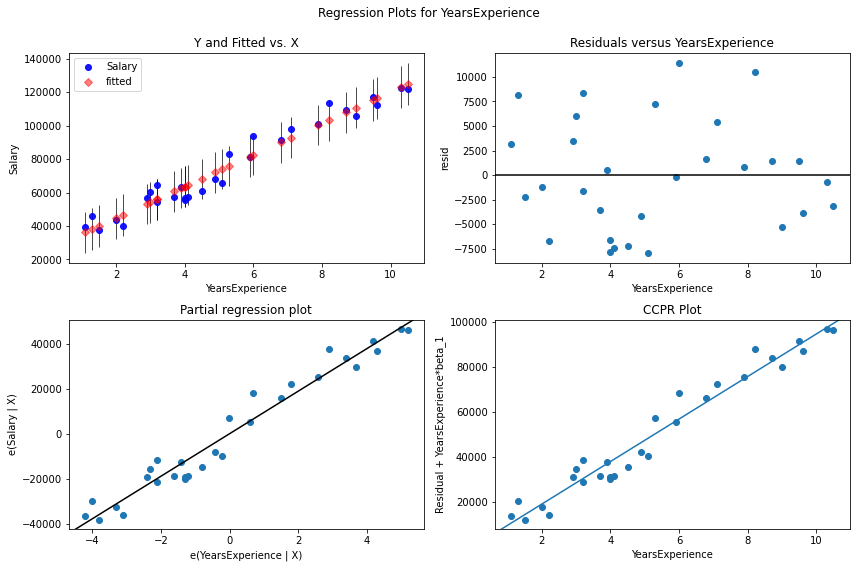

In [77]:
#defining figure size
fig = plt.figure(figsize=(12,8))
#producing regression plots
fig = statsmodels.api.graphics.plot_regress_exog(Regression_Model, 'YearsExperience', fig=fig)

### Testing the model

In [78]:
#Making prediction using given data
salary_pred = Regression_Model.predict()
#Comparing Actual and Predicted salary
salary_act = pd.DataFrame(salary_data.Salary)
salary_pred = pd.DataFrame(Regression_Model.predict(), columns = ['Predicted Salary'])
pd.concat([salary_act, salary_pred], axis = 1)

,Salary,Predicted Salary
0,39343.0,36187.158752
1,46205.0,38077.151217
2,37731.0,39967.143681
3,43525.0,44692.124842
4,39891.0,46582.117306
5,56642.0,53197.090931
6,60150.0,54142.087163
7,54445.0,56032.079627
8,64445.0,56032.079627
9,57189.0,60757.060788


Text(0, 0.5, 'Salary')

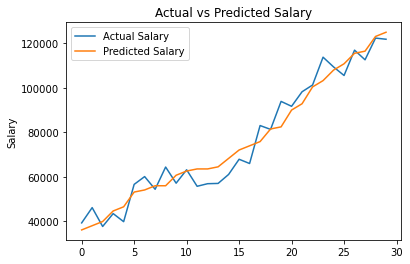

In [79]:
#Plotting graph of actual salary vs predicted salary
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(salary_act)
plt.plot(salary_pred)
plt.legend(['Actual Salary','Predicted Salary'])
plt.title("Actual vs Predicted Salary")
plt.ylabel("Salary")

### Predicting Salary using Model!

In [80]:
## r-squared value is greater than 0.95 hence model can be used for prediction!
x = (int(input("Enter experience in years : ")))
np.asarray(x)
x = pd.DataFrame([x], columns = ['YearsExperience'])
print('The expected salary is: ', Regression_Model.predict(x))

Enter experience in years : 100
The expected salary is:  0    970788.432344
dtype: float64
